In [16]:
import numpy as np

from IPython.display import clear_output
from pjdiagram import *
from ipywidgets import *

import quicksort
from quicksort import partition_example, quicksort_example

# Quicksort

## Summary

| Performance                 | Complexity       |
|-----------------------------|------------------|
|Worst-case                   | $O(n^2)$       |
|Best-case                    | $O(n\log{n})$           |
|Average                      | $O(n\log{n})$       |
|Worst-case space             | $O(n)$           |


## Algorithm

Pick a pivot point, and move all the items in the list greater than the pivot to the right, and all items less than the pivot to the left. Afterwards, `quicksort` is recurively applied to the sublists.

The partition function works by moving everything less than the pivot point to the left and everything greater than the pivot point to the right. This can be accomplished by keeping two indices starting from both sides of the array. The left index is incremented until it finds a value greater than the pivot point, and the right index is incremented until it finds a value less than the pivot point.

### Intuition

Given an unsorted list $u$:

$$ u = [5, 3, 10, 7, 15, 1, 4, 2] $$

pick a pivot $p$ from $u$. For this example we'll use the first item in $u$ ($p = 5$). Create two new lists: $l$ and $r$, where $l$ consists of all elements less than $p$ and $r$ consists of all elements greater than $p$:

$$ l = [3, 1, 4, 2] $$
$$ r = [10, 7, 15] $$

We can construct an ordered list with: `qsort(l) + p + qsort(r)`. The left side `qsort(l)` will again result in two lists:

$$ p = 3 $$
$$ l = [1, 2] $$
$$ r = [4] $$

putting these together we get: `[1, 2] + [3] + [4]` $\rightarrow$ `[1, 2, 3, 4]`. Evaluating the right side we get:

$$ p = 10 $$
$$ l = [7] $$
$$ r = [15] $$

putting these together we get: `[7] + [10] + [15]` $\rightarrow$ `[7, 10, 15]`. Going up one level we now have: `[1, 2, 3, 4] + [5] + [7, 10, 15]` $\rightarrow$ `[1, 2, 3, 4, 5, 7, 10, 15]`, which results in the sorted list.

However, constructing the list in this manner is not efficient in space. Instead we can create a `partition` function that functionally does the same thing, but instead sorts the elements in place.



In [10]:
def partition(lst, start, end): 
    # in this formulation, the pivot point is the first item
    pivot = lst[start]

    # start partitioning after the pivot point
    first = start + 1
    last = end

    # keep going until we covered the entire list
    while first <= last:
        # find the next element that is less than pivot
        while first <= last and lst[first] <= pivot:
            first += 1
            
        # find the next element that is greater than pivot
        while last >= first and lst[last] > pivot:
            last -= 1
            
        # and swap their values
        if first < last:
            lst[first], lst[last] = lst[last], lst[first]
            
    # finally, swap the pivot point with the last point
    lst[start], lst[last] = lst[last], lst[start]
    return last

To see the code in action (arrow denotes pivot point, highlighted cells indicate values to be swapped):

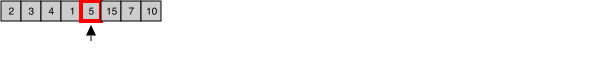

In [8]:
reload(quicksort)
contents = [5,3,10,7,15,1,4,2] #np.random.randint(100, size=20)
partition_example(contents, 0)

As can be see from the diagram above, everything to the left of the pivot will be less than the pivot, and everything to the right will be greater than the pivot. We can now recursively apply the partition to those values:

In [11]:

def quicksort(lst, first=None, last=None):
    if first == None: first = 0
    if last == None: last = len(lst)-1
    if first < last:
        # sort list so everything less than `pivot` is to the left of the pivot
        # and everything to the right is greater than the `pivot`
        p = partition(lst, first, last)
        
        # recursively apply `quicksort` to the items on the left of the pivot
        quicksort(lst, first, p-1)
        
        # recursively apply `quicksort` to the items on the right of the pivot
        quicksort(lst, p+1, last)
        
lst = [19, 92, 97, 34, 70, 26, 51, 97, 1, 42, 79, 34]
quicksort(lst)
print "sorted: ", lst        


sorted:  [1, 19, 26, 34, 34, 42, 51, 70, 79, 92, 97, 97]


Finally, we can see the code in action:

[1, 19, 26, 34, 34, 42, 51, 70, 79, 92, 97, 97]
(9, 8, 10)


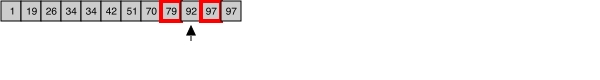

In [27]:
reload(quicksort)
quicksort_example([19, 92, 97, 34, 70, 26, 51, 97, 1, 42, 79, 34])

In [212]:
def quicksort(myList, start, end):
    if start < end:
        # partition the list
        pivot = partition(myList, start, end)
        # sort both halves
        quicksort(myList, start, pivot-1)
        quicksort(myList, pivot+1, end)
    return myList

def partition(myList, start, end):
    pivot = myList[start]
    left = start+1
    right = end
    done = False
    while not done:
        while left <= right and myList[left] <= pivot:
            left = left + 1
        while myList[right] >= pivot and right >=left:
            right = right -1
        if right < left:
            done= True
        else:
            # swap places
            temp=myList[left]
            myList[left]=myList[right]
            myList[right]=temp
    # swap start with myList[right]
    temp=myList[start]
    myList[start]=myList[right]
    myList[right]=temp
    return right

lst = [19, 92, 97, 34, 70, 26, 51, 97, 1, 42, 79, 34]
quicksort(lst, 0, len(lst)-1)
print(lst)

[1, 19, 26, 34, 34, 42, 51, 70, 79, 92, 97, 97]
